#### the IMDB class

In [4]:
#import os 
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Import packages
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# default values
NUM_WORDS = 10000
BATCH_SIZE = 512

class Imdb:
    def __init__(self, num_words = NUM_WORDS):
        self.x_train, self.y_train, \
        self.x_test, self.y_test = self._load(num_words)
        self.model = self._model()
        

    def _load(self, num_words):
        (x_train_raw, y_train_raw), (x_test_raw, y_test_raw) \
            = imdb.load_data(num_words=num_words)

        # vectorize reviews
        x_train = self._vectorize_sequences(x_train_raw, num_words)
        y_train = np.asarray(y_train_raw).astype('float32')

        x_test = self._vectorize_sequences(x_test_raw, num_words)
        y_test = np.asarray(y_test_raw).astype('float32')

        #x_train, x_val, y_train, y_val \
        #    = train_test_split(x_train_vec, y_train, test_size=0.2)

        return x_train, y_train, x_test, y_test


    def _model(self):
        model = keras.Sequential([
            layers.Dense(32, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(1, activation="sigmoid")
        ])

        # model compilation
        model.compile(optimizer="rmsprop",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])
        return model


    def plot_loss(self, history):
        # Plotting the training and validation loss
        history_dict = history.history
        loss_values = history_dict["loss"]
        val_loss_values = history_dict["val_loss"]
        epochs = range(1, len(loss_values) + 1)
        plt.figure(1)
        plt.plot(epochs, loss_values, "r", label="Training loss")
        plt.plot(epochs, val_loss_values, "r--", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()


    def plot_accuracy(self, history):
        history_dict = history.history
        acc = history_dict["accuracy"]
        val_acc = history_dict["val_accuracy"]
        epochs = range(1, len(acc) + 1)
        plt.figure(2)
        plt.plot(epochs, acc, "b", label="Training acc")
        plt.plot(epochs, val_acc, "b--", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()


    def train(self, epochs=20):
        if self.model is None: 
            print('[INFO] model is not defined.')
            return
        
        history = self.model.fit(self.x_train, self.y_train, \
                                 epochs = epochs, validation_split = 0.2,
                                 batch_size = BATCH_SIZE)
        self.plot_loss(history)
        self.plot_accuracy(history)
        return history
        
        
    def evaluate(self):
        score = self.model.evaluate(self.x_test, self.y_test)
        print(f'[INFO] Test loss: {score[0]}')
        print(f'[INFO] Test accuracy: {score[1]}')
        
        
    def _vectorize_sequences(self, sequences, dimension):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            for j in sequence:
                results[i, j] = 1.
        return results

#### Calling the Imdb class and loading the dataset

In [5]:
imdb = Imdb() 

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-14 22:51:41.939096: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-14 22:51:41.939210: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### Traing the model

Epoch 1/100


2022-11-14 22:52:02.372578: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-14 22:52:02.667980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 2s 28ms/step - loss: 0.4691 - accuracy: 0.8031 - val_loss: 0.3330 - val_accuracy: 0.8842
Epoch 2/100
 1/40 [..............................] - ETA: 0s - loss: 0.2740 - accuracy: 0.9199

2022-11-14 22:52:03.909305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 14ms/step - loss: 0.2628 - accuracy: 0.9100 - val_loss: 0.4011 - val_accuracy: 0.8324
Epoch 3/100
40/40 [==============================] - 1s 13ms/step - loss: 0.1992 - accuracy: 0.9288 - val_loss: 0.2736 - val_accuracy: 0.8906
Epoch 4/100
40/40 [==============================] - 1s 13ms/step - loss: 0.1636 - accuracy: 0.9419 - val_loss: 0.2803 - val_accuracy: 0.8920
Epoch 5/100
40/40 [==============================] - 1s 13ms/step - loss: 0.1307 - accuracy: 0.9556 - val_loss: 0.3165 - val_accuracy: 0.8808
Epoch 6/100
40/40 [==============================] - 1s 14ms/step - loss: 0.1096 - accuracy: 0.9631 - val_loss: 0.3237 - val_accuracy: 0.8852
Epoch 7/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0885 - accuracy: 0.9725 - val_loss: 0.3560 - val_accuracy: 0.8788
Epoch 8/100
40/40 [==============================] - 1s 14ms/step - loss: 0.0756 - accuracy: 0.9768 - val_loss: 0.3880 - val_accuracy: 0.8748
Epoch 9/100
40/40 

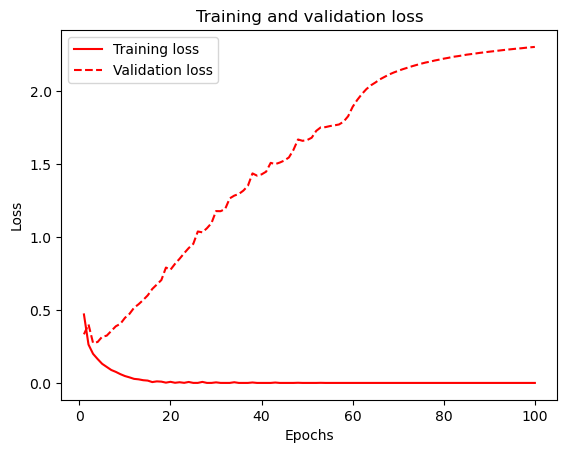

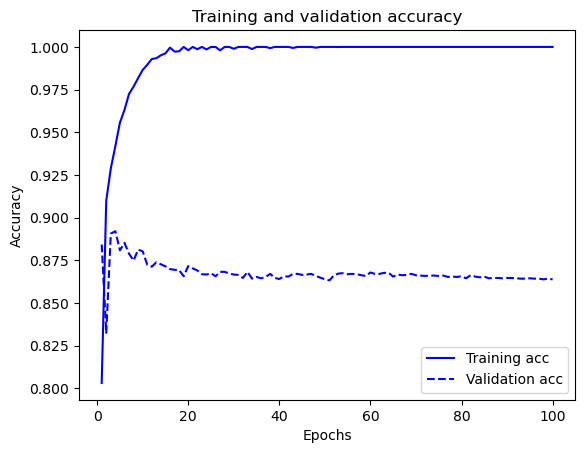

In [6]:
history = imdb.train(epochs=100)

In [7]:
# Evalluting the model
imdb.evaluate()

782/782 [==============================] - 5s 6ms/step - loss: 2.4979 - accuracy: 0.8496
[INFO] Test loss: 2.4978740215301514
[INFO] Test accuracy: 0.8495600819587708


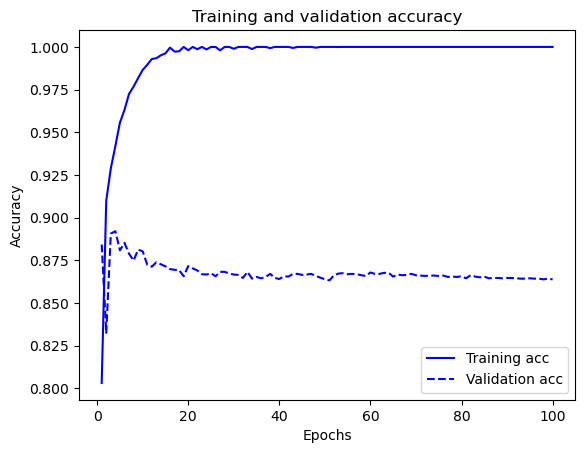

In [8]:
# Plotting IMDB model accuracy history
imdb.plot_accuracy(history)

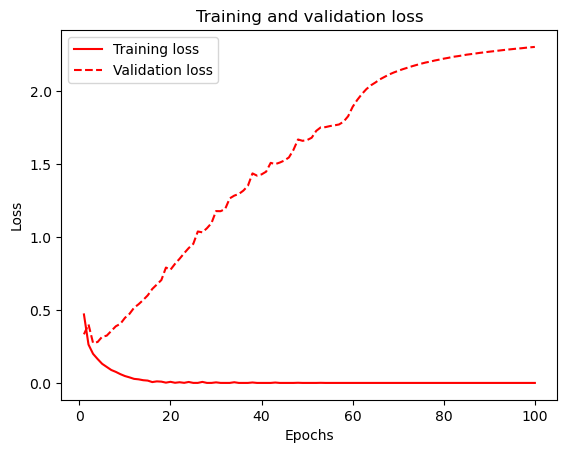

In [9]:
# Plotiing model loss history
imdb.plot_loss(history)

### Reuters Class

In [11]:
#import os 
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Import packages
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.datasets import reuters
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

# default values
NUM_WORDS = 10000
BATCH_SIZE = 512

class Reuters:
    def __init__(self, num_words = NUM_WORDS):
        self.x_train, self.y_train, \
        self.x_test, self.y_test = self._load(num_words)
        self.model = self._model()
        

    def _load(self, num_words):
        (x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = keras.datasets.reuters.load_data(num_words=num_words)

        # vectorize reviews
        x_train = self._vectorize_sequences(x_train_raw, num_words)
        y_train = np.asarray(y_train_raw).astype('float32')

        x_test = self._vectorize_sequences(x_test_raw, num_words)
        y_test = np.asarray(y_test_raw).astype('float32')
        y_train=to_categorical(y_train)
        y_test=to_categorical(y_test)
        #x_train, x_val, y_train, y_val \
        #    = train_test_split(x_train_vec, y_train, test_size=0.2)

        return x_train, y_train, x_test, y_test


    def _model(self):
        model = keras.Sequential([
            layers.Dense(64, activation="relu"),
            layers.Dense(64, activation="relu"),
            layers.Dense(46, activation="softmax")
        ])

        # model compilation
        model.compile(optimizer="rmsprop",
                        loss="categorical_crossentropy",
                        metrics=["accuracy"])
        return model


    def plot_loss(self, history):
        # Plotting the training and validation loss
        history_dict = history.history
        loss_values = history_dict["loss"]
        val_loss_values = history_dict["val_loss"]
        epochs = range(1, len(loss_values) + 1)
        plt.figure(1)
        plt.plot(epochs, loss_values, "r", label="Training loss")
        plt.plot(epochs, val_loss_values, "r--", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()


    def plot_accuracy(self, history):
        history_dict = history.history
        acc = history_dict["accuracy"]
        val_acc = history_dict["val_accuracy"]
        epochs = range(1, len(acc) + 1)
        plt.figure(2)
        plt.plot(epochs, acc, "b", label="Training acc")
        plt.plot(epochs, val_acc, "b--", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()


    def train(self, epochs=20):
        if self.model is None: 
            print('[INFO] model is not defined.')
            return
        
        history = self.model.fit(self.x_train, self.y_train, \
                                 epochs = epochs, validation_split = 0.2,
                                 batch_size = BATCH_SIZE)
        self.plot_loss(history)
        self.plot_accuracy(history)
        return history
        
        
    def evaluate(self):
        score = self.model.evaluate(self.x_test, self.y_test)
        print(f'[INFO] Test loss: {score[0]}')
        print(f'[INFO] Test accuracy: {score[1]}')
        
        
    def _vectorize_sequences(self, sequences, dimension=10000):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            for j in sequence:
                results[i, j] = 1.
        return results
    def to_one_hot(labels, dimension=46):
        results = np.zeros((len(labels), dimension))
        for i,label in enumerate(labels):
            results[i,label] = 1
        return results

In [12]:
# Calling Reuters class
reuters = Reuters()

Epoch 1/100


2022-11-14 22:54:49.838113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 1s 33ms/step - loss: 2.6243 - accuracy: 0.5113 - val_loss: 1.8076 - val_accuracy: 0.6316
Epoch 2/100
 1/15 [=>............................] - ETA: 0s - loss: 1.6648 - accuracy: 0.6660

2022-11-14 22:54:50.381809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 22ms/step - loss: 1.4732 - accuracy: 0.6928 - val_loss: 1.3861 - val_accuracy: 0.7084
Epoch 3/100
15/15 [==============================] - 0s 17ms/step - loss: 1.1056 - accuracy: 0.7692 - val_loss: 1.2254 - val_accuracy: 0.7407
Epoch 4/100
15/15 [==============================] - 0s 17ms/step - loss: 0.8738 - accuracy: 0.8173 - val_loss: 1.1613 - val_accuracy: 0.7234
Epoch 5/100
15/15 [==============================] - 0s 19ms/step - loss: 0.7089 - accuracy: 0.8498 - val_loss: 1.1089 - val_accuracy: 0.7401
Epoch 6/100
15/15 [==============================] - 0s 18ms/step - loss: 0.5772 - accuracy: 0.8777 - val_loss: 1.0099 - val_accuracy: 0.7807
Epoch 7/100
15/15 [==============================] - 0s 17ms/step - loss: 0.4665 - accuracy: 0.9040 - val_loss: 0.9789 - val_accuracy: 0.7974
Epoch 8/100
15/15 [==============================] - 0s 18ms/step - loss: 0.3789 - accuracy: 0.9236 - val_loss: 1.0399 - val_accuracy: 0.7846
Epoch 9/100
15/15 

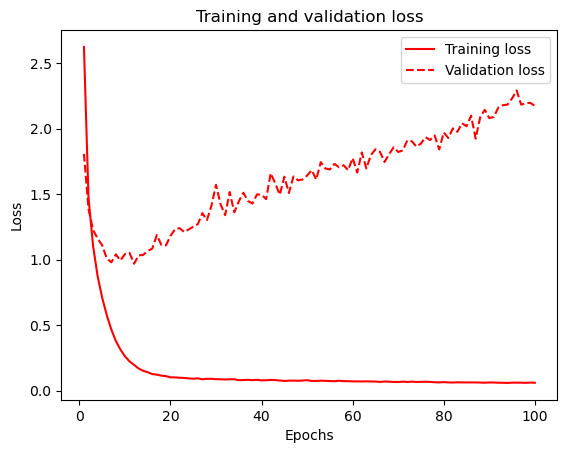

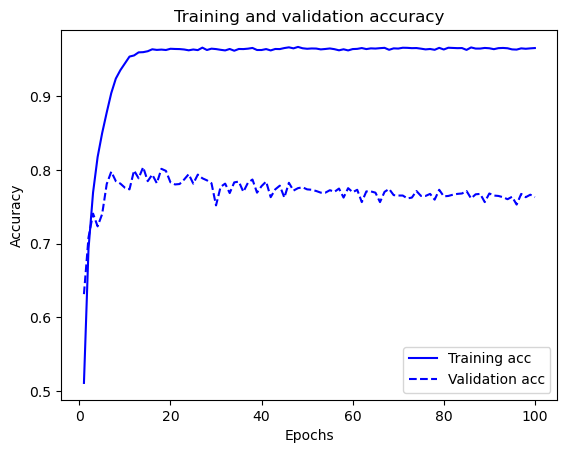

In [13]:
# training Reuters model
reuters.train(epochs = 100)

In [14]:
# evaluting the Reuters model
reuters.evaluate()

71/71 [==============================] - 1s 10ms/step - loss: 2.2141 - accuracy: 0.7542
[INFO] Test loss: 2.214082956314087
[INFO] Test accuracy: 0.7542297840118408


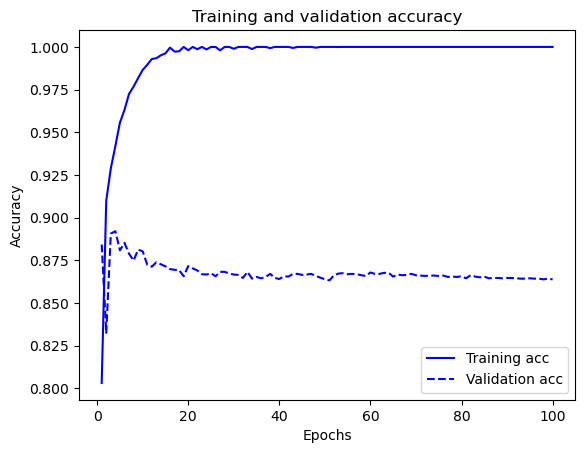

In [15]:
# plotting Reuters accuracy
reuters.plot_accuracy(history)

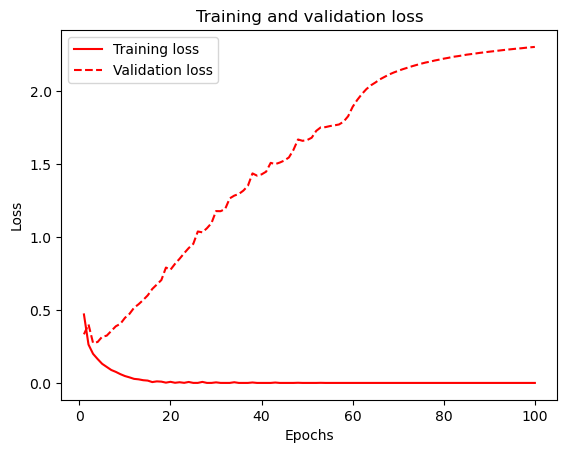

In [16]:
# plotting Reuters loss history
reuters.plot_loss(history)

### the Boston_Housing class

In [17]:
#import os 
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

# Import packages
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.datasets import boston_housing
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# default values
NUM_WORDS = 10000
BATCH_SIZE = 512

class Boston_Housing:
    def __init__(self):
        self.x_train, self.y_train, \
        self.x_test, self.y_test = self._load()
        self.model = self._model()
        

    def _load(self):
        (x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

        # vectorize reviews
        mean=x_train.mean(axis=0)
        x_train-=mean
        std=x_train.std(axis=0)
        x_train/=std
        x_test-=mean
        x_test/=std
        
        return x_train, y_train, x_test, y_test


    def _model(self):
        model = keras.Sequential([
            layers.Dense(64, activation="relu",input_shape=(self.x_train.shape[1],)),
            layers.Dense(64, activation="relu"),
            layers.Dense(1)
        ])

        # model compilation
        model.compile(optimizer="rmsprop",
                        loss="mse",
                        metrics=["mae"])
        return model


    def plot_loss(self, history):
        # Plotting the training and validation loss
        history_dict = history.history
        loss_values = history_dict["loss"]
        val_loss_values = history_dict["val_loss"]
        epochs = range(1, len(loss_values) + 1)
        plt.figure(1)
        plt.plot(epochs, loss_values, "r", label="Training loss")
        plt.plot(epochs, val_loss_values, "r--", label="Validation loss")
        plt.title("Training and validation loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()


    def plot_accuracy(self, history):
        history_dict = history.history
        acc = history_dict["mae"]
        val_acc = history_dict["val_mae"]
        epochs = range(1, len(acc) + 1)
        plt.figure(2)
        plt.plot(epochs, acc, "b", label="Training acc")
        plt.plot(epochs, val_acc, "b--", label="Validation acc")
        plt.title("Training and validation accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()


    def train(self, epochs=20):
        if self.model is None: 
            print('[INFO] model is not defined.')
            return
        
        history = self.model.fit(self.x_train, self.y_train, \
                                 epochs = epochs, validation_split = 0.2,
                                 batch_size = BATCH_SIZE)
        self.plot_loss(history)
        self.plot_accuracy(history)
        return history
        
        
    def evaluate(self):
        score = self.model.evaluate(self.x_test, self.y_test)
        print(f'[INFO] Test loss: {score[0]}')
        print(f'[INFO] Test accuracy: {score[1]}')
        
        
    def _vectorize_sequences(self, sequences, dimension=10000):
        results = np.zeros((len(sequences), dimension))
        for i, sequence in enumerate(sequences):
            for j in sequence:
                results[i, j] = 1.
        return results
    def k_fold(self):
          k = 3
          num_val_samples = len(self.x_train) // k
          num_epochs = 40
          all_scores = []
          for i in range(self, k):
             print(f'Processing fold # {i}')
             val_data = self.x_train[i * num_val_samples: (i+1) * num_val_samples]
             val_targets = self.y_train[i * num_val_samples: (i+1) * num_val_samples]
             partial_train_data = np.concatenate(
                                     [self.x_train[:i * num_val_samples],
                                     self.x_train[(i+1) * num_val_samples:]],
                                     axis=0)
             partial_train_targets = np.concatenate(
                                     [self.y_train[:i * num_val_samples],
                                     self.y_train[(i+1)*num_val_samples:]],
                                     axis=0)
             model = self.train()
             model.fit(partial_train_data,
                       partial_train_targets,
                       epochs=num_epochs,
                       batch_size=16,
                       verbose=0)
             val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
             all_scores.append(val_mae)

In [18]:
# calling Boston_Housing class
boston_housing = Boston_Housing()

Epoch 1/20


2022-11-14 22:36:28.753666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 24ms/step - loss: 0.4593 - accuracy: 0.8085 - val_loss: 0.3423 - val_accuracy: 0.8718
Epoch 2/20
 1/40 [..............................] - ETA: 0s - loss: 0.2746 - accuracy: 0.9199

2022-11-14 22:36:29.736919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 13ms/step - loss: 0.2620 - accuracy: 0.9101 - val_loss: 0.2768 - val_accuracy: 0.8922
Epoch 3/20
40/40 [==============================] - 1s 15ms/step - loss: 0.1973 - accuracy: 0.9292 - val_loss: 0.2718 - val_accuracy: 0.8936
Epoch 4/20
40/40 [==============================] - 1s 13ms/step - loss: 0.1594 - accuracy: 0.9436 - val_loss: 0.2801 - val_accuracy: 0.8934
Epoch 5/20
40/40 [==============================] - 1s 13ms/step - loss: 0.1323 - accuracy: 0.9546 - val_loss: 0.2993 - val_accuracy: 0.8906
Epoch 6/20
40/40 [==============================] - 1s 13ms/step - loss: 0.1129 - accuracy: 0.9614 - val_loss: 0.3603 - val_accuracy: 0.8790
Epoch 7/20
40/40 [==============================] - 1s 13ms/step - loss: 0.0918 - accuracy: 0.9697 - val_loss: 0.3860 - val_accuracy: 0.8736
Epoch 8/20
40/40 [==============================] - 1s 13ms/step - loss: 0.0831 - accuracy: 0.9708 - val_loss: 0.3903 - val_accuracy: 0.8788
Epoch 9/20
40/40 [======

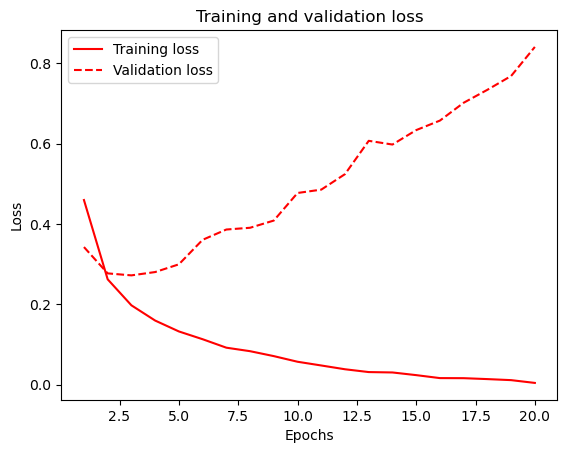

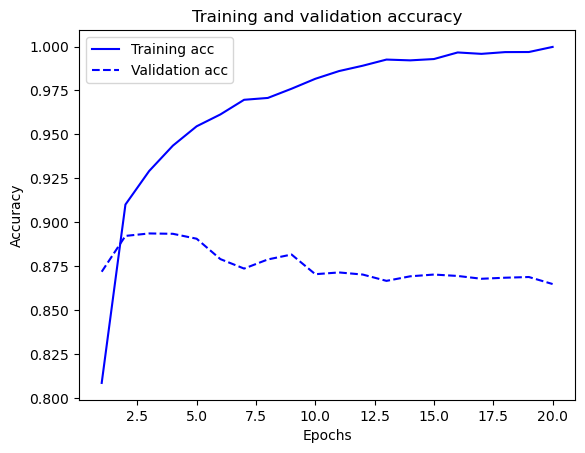

782/782 [==============================] - 4s 5ms/step - loss: 0.9276 - accuracy: 0.8432
[INFO] Test loss: 0.9275516271591187
[INFO] Test accuracy: 0.8432000279426575
Epoch 1/30


2022-11-14 22:36:46.892253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 1s 35ms/step - loss: 2.8928 - accuracy: 0.5264 - val_loss: 1.9488 - val_accuracy: 0.6450
Epoch 2/30
 5/15 [=========>....................] - ETA: 0s - loss: 1.7266 - accuracy: 0.6762

2022-11-14 22:36:47.566312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 19ms/step - loss: 1.5767 - accuracy: 0.6931 - val_loss: 1.4160 - val_accuracy: 0.7062
Epoch 3/30
15/15 [==============================] - 0s 18ms/step - loss: 1.1454 - accuracy: 0.7563 - val_loss: 1.2732 - val_accuracy: 0.6989
Epoch 4/30
15/15 [==============================] - 0s 17ms/step - loss: 0.9079 - accuracy: 0.8017 - val_loss: 1.1303 - val_accuracy: 0.7501
Epoch 5/30
15/15 [==============================] - 0s 18ms/step - loss: 0.7314 - accuracy: 0.8473 - val_loss: 1.1269 - val_accuracy: 0.7418
Epoch 6/30
15/15 [==============================] - 0s 18ms/step - loss: 0.5974 - accuracy: 0.8799 - val_loss: 0.9965 - val_accuracy: 0.7869
Epoch 7/30
15/15 [==============================] - 0s 18ms/step - loss: 0.4852 - accuracy: 0.9035 - val_loss: 0.9655 - val_accuracy: 0.7986
Epoch 8/30
15/15 [==============================] - 0s 18ms/step - loss: 0.3968 - accuracy: 0.9226 - val_loss: 0.9888 - val_accuracy: 0.7885
Epoch 9/30
15/15 [======

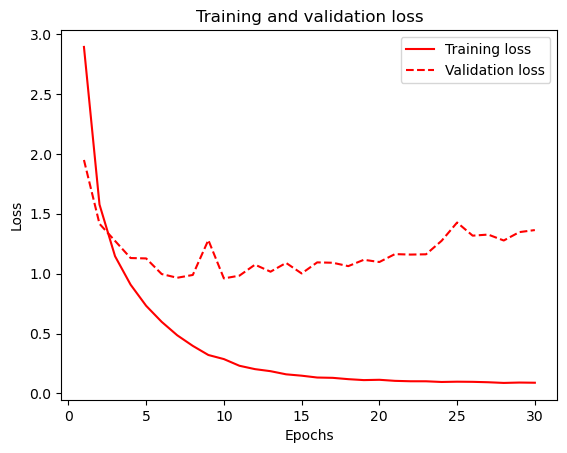

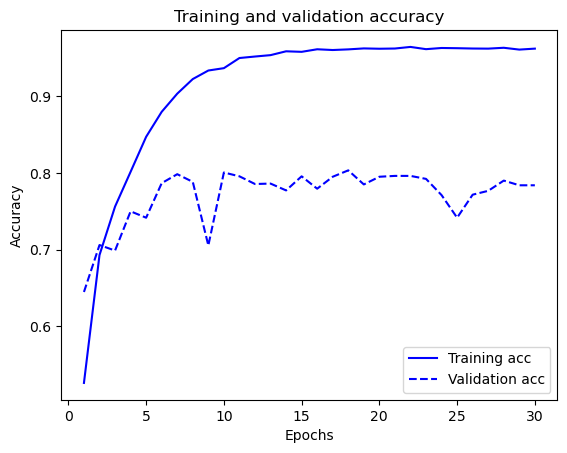

71/71 [==============================] - 1s 10ms/step - loss: 1.4665 - accuracy: 0.7729
[INFO] Test loss: 1.4664809703826904
[INFO] Test accuracy: 0.7729296684265137
Epoch 1/30
1/1 [==============================] - ETA: 0s - loss: 564.7747 - mae: 21.9693

2022-11-14 22:36:56.467337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 409ms/step - loss: 564.7747 - mae: 21.9693 - val_loss: 618.9827 - val_mae: 23.1810
Epoch 2/30
1/1 [==============================] - 0s 50ms/step - loss: 550.8596 - mae: 21.6566 - val_loss: 607.8082 - val_mae: 22.9473
Epoch 3/30
1/1 [==============================] - 0s 30ms/step - loss: 540.4371 - mae: 21.4212 - val_loss: 597.9879 - val_mae: 22.7399
Epoch 4/30
1/1 [==============================] - 0s 34ms/step - loss: 531.2383 - mae: 21.2123 - val_loss: 588.8207 - val_mae: 22.5445
Epoch 5/30
1/1 [==============================] - ETA: 0s - loss: 522.6472 - mae: 21.0154

2022-11-14 22:36:56.694447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 34ms/step - loss: 522.6472 - mae: 21.0154 - val_loss: 579.9846 - val_mae: 22.3551
Epoch 6/30
1/1 [==============================] - 0s 29ms/step - loss: 514.4047 - mae: 20.8254 - val_loss: 571.3124 - val_mae: 22.1685
Epoch 7/30
1/1 [==============================] - 0s 28ms/step - loss: 506.3159 - mae: 20.6384 - val_loss: 562.7026 - val_mae: 21.9825
Epoch 8/30
1/1 [==============================] - 0s 28ms/step - loss: 498.3360 - mae: 20.4535 - val_loss: 554.0555 - val_mae: 21.7953
Epoch 9/30
1/1 [==============================] - 0s 28ms/step - loss: 490.3787 - mae: 20.2687 - val_loss: 545.3280 - val_mae: 21.6052
Epoch 10/30
1/1 [==============================] - 0s 28ms/step - loss: 482.3489 - mae: 20.0815 - val_loss: 536.4844 - val_mae: 21.4111
Epoch 11/30
1/1 [==============================] - 0s 29ms/step - loss: 474.2122 - mae: 19.8909 - val_loss: 527.5212 - val_mae: 21.2130
Epoch 12/30
1/1 [==============================] - 0s 27ms/step 

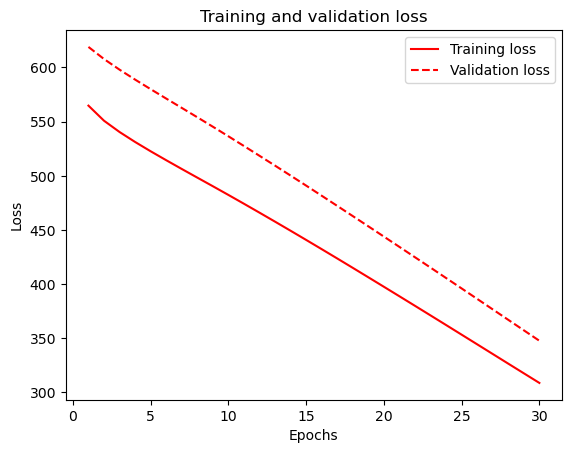

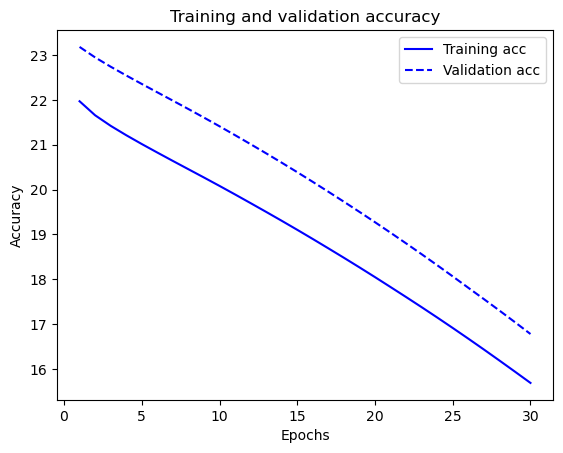

4/4 [==============================] - 0s 11ms/step - loss: 326.2187 - mae: 16.1766
[INFO] Test loss: 326.21868896484375
[INFO] Test accuracy: 16.176576614379883


In [42]:
from imdb import Imdb
imdb=Imdb()
imdb._load(num_words=10000)
imdb.train(epochs=20)
imdb.evaluate()

    #%%
#from reuters import Reuters
reuters=Reuters()
reuters._load(num_words=10000)
reuters.train(epochs=30)
reuters.evaluate()
#%%
# Boston Housing price analysis



# from boston_housing import Boston_Housing

boston_housing= Boston_Housing()
boston_housing._load()
boston_housing.train(epochs=30)
boston_housing.evaluate()

In [2]:

import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

OpenCV: not authorized to capture video (status 0), requesting...
OpenCV: camera failed to properly initialize!


In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()